In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
from api_keys import api_key
import json

# Import API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
cities = []
counter = 0
rep = 'true'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(cities) == 0:
            cities.append(citdict)
            counter = counter + 1
            continue
        else:
            #Eliminating repeats
            for city in cities:
                if city['city'] == citdict['city']:
                    rep = 'true'
        if rep == 'false':
            cities.append(citdict)
            counter = counter + 1
        else:
            rep = 'false'
#Some stuff to check
#print(len(cities))
print(cities[250]) 

{'city': 'willowmore', 'country': 'za', 'lat': -33, 'long': 23}


In [3]:
citypd = pd.DataFrame({ 'city': [x['city'] for x in cities], 'country': [x['country'] for x in cities],})
                                
OurCities = citypd.sample(500)

#Checking Stuff Our Format is: id / city /country
print(OurCities)

                       city country
6222              bonavista      ca
2045                    yei      sd
5423             erdaojiang      cn
4763                sciacca      it
6053                 pravda      ru
4453                guozhen      cn
600                   ihosy      mg
835                mineiros      br
962                   kaoma      zm
4687                  hunza      pk
3915              kathmandu      np
6456           dunmore east      ie
267             villa maria      ar
3682                liuzhou      cn
7688       nizhniy bestyakh      ru
3297                 washim      in
3448               jaleswar      in
5646          divnomorskoye      ru
3460                lao cai      vn
3753              darbhanga      in
5072              red bluff      us
3434                   amod      in
4797      bandar-e torkaman      ir
3681                 xingyi      cn
1016                chongwe      zm
5511              katsiveli      ua
3154             codrington 

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
counter = 0
OurCities['latitude'] = ""
OurCities['longitude'] = ""
OurCities['temperature'] = ""
OurCities['humidity'] = ""
OurCities['cloudiness'] = ""
OurCities['wind_speed'] = ""

for index,row in OurCities.iterrows():
    counter = counter + 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']    
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        #Pulling our data
        OurCities.set_value(index, "latitude", int(cityweather['coord']['lat']))
        OurCities.set_value(index, "longitude", int(cityweather['coord']['lat']))
        OurCities.set_value(index, "temperature", int(cityweather['main']['temp']))
        OurCities.set_value(index, "humidity", int(cityweather['main']['humidity']))
        OurCities.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        OurCities.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"City Count: {counter}")
    print(f"We're looking at {row['city']}" )
    print(f"The URL we found is {query_url}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

City Count: 1
We're looking at bonavista
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=bonavista
No data for this city: yei
City Count: 2
We're looking at yei
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=yei
City Count: 3
We're looking at erdaojiang
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=erdaojiang
City Count: 4
We're looking at sciacca
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=sciacca
City Count: 5
We're looking at pravda
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=pravda
City Count: 6
We're looking at guozhen
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a799728

City Count: 48
We're looking at urzhum
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=urzhum
City Count: 49
We're looking at manosque
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=manosque
City Count: 50
We're looking at salme
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=salme
City Count: 51
We're looking at nurota
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=nurota
City Count: 52
We're looking at setermoen
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=setermoen
City Count: 53
We're looking at carupano
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&

City Count: 95
We're looking at hong gai
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=hong gai
City Count: 96
We're looking at gusau
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=gusau
City Count: 97
We're looking at madras
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=madras
City Count: 98
We're looking at keffi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=keffi
City Count: 99
We're looking at kisesa
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=kisesa
City Count: 100
We're looking at joensuu
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Im

City Count: 142
We're looking at atkarsk
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=atkarsk
City Count: 143
We're looking at ouricuri
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ouricuri
City Count: 144
We're looking at guadalajara
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=guadalajara
City Count: 145
We're looking at petropavl
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=petropavl
City Count: 146
We're looking at redwater
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=redwater
City Count: 147
We're looking at borodino
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997

City Count: 189
We're looking at senneterre
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=senneterre
City Count: 190
We're looking at basudebpur
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=basudebpur
No data for this city: bolsheustikinskoye
City Count: 191
We're looking at bolsheustikinskoye
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=bolsheustikinskoye
City Count: 192
We're looking at abong mbang
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=abong mbang
City Count: 193
We're looking at corn island
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=corn island
City Count: 194
We're looking at lagdo
The URL w

City Count: 236
We're looking at carpentras
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=carpentras
City Count: 237
We're looking at ivybridge
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ivybridge
City Count: 238
We're looking at uaua
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=uaua
City Count: 239
We're looking at mailsi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=mailsi
City Count: 240
We're looking at mae ramat
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=mae ramat
City Count: 241
We're looking at bayanday
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad

City Count: 283
We're looking at rumoi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=rumoi
City Count: 284
We're looking at vikyrovice
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=vikyrovice
City Count: 285
We're looking at srandakan
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=srandakan
City Count: 286
We're looking at los zacatones
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=los zacatones
City Count: 287
We're looking at progreso
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=progreso
City Count: 288
We're looking at dunedin
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7

City Count: 330
We're looking at opelousas
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=opelousas
City Count: 331
We're looking at khartoum
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=khartoum
City Count: 332
We're looking at fourmies
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=fourmies
City Count: 333
We're looking at buloh kasap
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=buloh kasap
City Count: 334
We're looking at lima
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=lima
City Count: 335
We're looking at terrasini
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0

No data for this city: phan rang
City Count: 377
We're looking at phan rang
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=phan rang
City Count: 378
We're looking at dubrovnik
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=dubrovnik
City Count: 379
We're looking at ballina
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ballina
City Count: 380
We're looking at balaka
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=balaka
City Count: 381
We're looking at isagarh
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=isagarh
City Count: 382
We're looking at stepnyak
The URL we found is http://api.openweathermap.org/data/2.5/

No data for this city: santa cruz de rosales
City Count: 424
We're looking at santa cruz de rosales
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=santa cruz de rosales
City Count: 425
We're looking at dzilam gonzalez
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=dzilam gonzalez
City Count: 426
We're looking at huaiyuan
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=huaiyuan
City Count: 427
We're looking at hirado
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=hirado
City Count: 428
We're looking at bredasdorp
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=bredasdorp
City Count: 429
We're looking at palmerston
T

City Count: 472
We're looking at alindao
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=alindao
City Count: 473
We're looking at macapa
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=macapa
No data for this city: bolshiye klyuchishchi
City Count: 474
We're looking at bolshiye klyuchishchi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=bolshiye klyuchishchi
City Count: 475
We're looking at myanaung
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=myanaung
City Count: 476
We're looking at sayville
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=sayville
City Count: 477
We're looking at morondava
The URL we found is ht

In [5]:
OurCities = OurCities[OurCities.latitude != ""]
print(OurCities)

                   city country latitude longitude temperature humidity  \
6222          bonavista      ca       48        48          52       98   
5423         erdaojiang      cn       41        41          58       85   
4763            sciacca      it       37        37          62       88   
6053             pravda      ru       43        43          41      100   
4453            guozhen      cn       29        29          75       70   
600               ihosy      mg      -22       -22          52       86   
835            mineiros      br      -17       -17          71       75   
962               kaoma      zm      -14       -14          68       40   
3915          kathmandu      np       27        27          71       83   
6456       dunmore east      ie       52        52          43      100   
267         villa maria      ar        4         4          55       87   
3682            liuzhou      cn       24        24          76       76   
7688   nizhniy bestyakh  

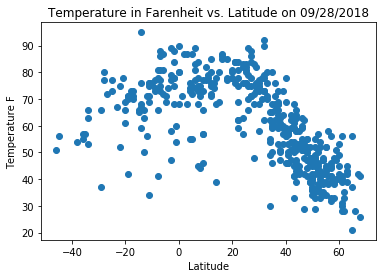

In [6]:
#Constructing Figure 1: Temperature vs Latitude

#Finally using the time dependency
date = time.strftime("%m/%d/%Y")

plt.scatter(OurCities['latitude'],OurCities['temperature'])

plt.title(f"Temperature in Farenheit vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Temperature F")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_1.png")

plt.show()

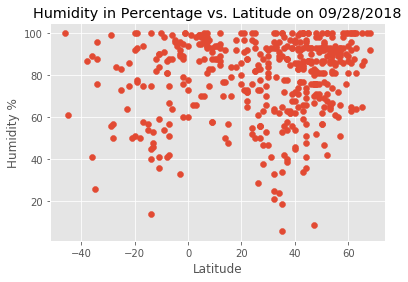

In [7]:
#Constructing Figure 2: Humidity vs Latitude
plt.scatter(OurCities['latitude'], OurCities['humidity'])

plt.title(f"Humidity in Percentage vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Humidity %")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_2.png")

plt.show()

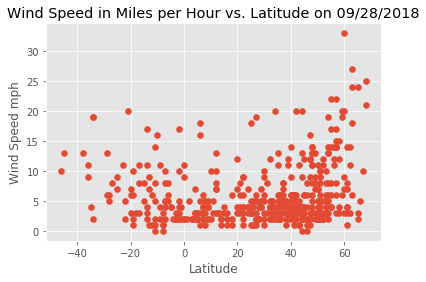

In [8]:
#Constructing Figure 3: Wind Speed vs Latitude
plt.scatter(OurCities['latitude'], OurCities['wind_speed'])

plt.title(f"Wind Speed in Miles per Hour vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed mph")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_3.png")

plt.show()

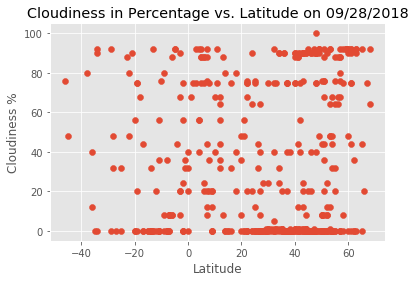

In [9]:
#Constructing Figure 4: Cloudiness vs Latitude
plt.scatter(OurCities['latitude'], OurCities['cloudiness'])

plt.title(f"Cloudiness in Percentage vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness %")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_4.png")

plt.show()

In [12]:
OurCities.to_csv("Figures/Weatherin500Cities.csv", encoding="utf-8", index=False)
df = pd.read_csv("Figures/Weatherin500Cities.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,bonavista,ca,48,48,52,98,100,14
1,erdaojiang,cn,41,41,58,85,12,6
2,sciacca,it,37,37,62,88,75,5
3,pravda,ru,43,43,41,100,12,4
4,guozhen,cn,29,29,75,70,0,5
